In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/Users/juanhernandez/Development/NWU-Pacific/NWU-Pacific/')

In [3]:
df_topics = pd.read_hdf('/Users/juanhernandez/Documents/NWU/data/topics.hdf', 'topics')

In [4]:
df_orig = pd.read_csv('/Users/juanhernandez/Downloads/consumer_complaints.csv')

In [63]:
df_vectors = pd.read_hdf('/Users/juanhernandez/Documents/NWU/data/vectors.hdf', 'vectors')

In [64]:
df = pd.merge(df_orig, df_topics, on='Complaint ID', how='inner')

In [65]:
df = pd.merge(df, df_vectors, on='Complaint ID', how='inner')

In [66]:
df=df[df['Company public response'].isnull()==False]

In [67]:
df['Company public response'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes it acted appropriately as authorized by contract or law',
       "Company can't verify or dispute the facts in the complaint",
       'Company chooses not to provide a public response',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company disputes the facts presented in the complaint',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure'],
      dtype=object)

In [68]:
label = 'Company believes complaint represents an opportunity for improvement to better serve consumers' 
label = 'Company disputes the facts presented in the complaint'
y = (df['Company public response']==label).astype(int)

In [73]:
X_topics = pd.DataFrame(df['topics'].values.tolist(), columns = ['topic_{}'.format(k) for k in range(1,21)])
V = len(df['vectors'].iloc[0])
X_vectors = pd.DataFrame(df['vectors'].values.tolist(), columns = ['vector_{}'.format(k) for k in range(1,V+1)])

In [74]:
X = pd.concat([X_vectors, X_topics], axis=1)
X = X_vectors

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', n_estimators=200)

In [79]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [80]:
y_hat_test = model.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
test_auc = roc_auc_score(y_test, y_hat_test)
y_hat_train = model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_hat_train)
train_auc = roc_auc_score(y_train, y_hat_train)

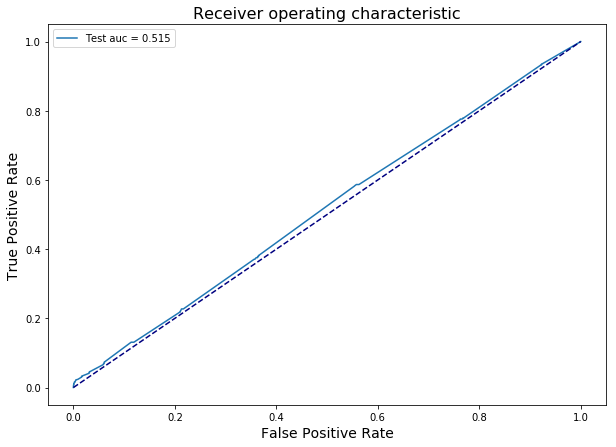

In [81]:
plt.figure(figsize=(10,7))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic', fontsize=16)
plt.plot(fpr_test, tpr_test, label='Test auc = {:.3f}'.format(test_auc))
# plt.plot(fpr_train, tpr_train, label='Train auc = {:.3f}'.format(train_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend()
plt.show()